In [1]:
#Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Data Preprocessing
from sklearn.model_selection import train_test_split

#Models ML
from sklearn.neighbors import KNeighborsClassifier
#Metrics
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn import metrics
from sklearn.metrics import mean_squared_error #,r2_score
from sklearn.metrics import roc_curve, auc

In [2]:
data = pd.read_csv('framingham.csv')
data

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


In [3]:
n_ones = len(data[data['TenYearCHD'] == 1])
n_zeros = len(data[data['TenYearCHD'] == 0])
print(n_ones)
print(n_zeros)

644
3596


In [4]:
ones = data[data['TenYearCHD'] == 1]
zeros = data[data['TenYearCHD'] == 0].iloc[0:644]
data = pd.concat([ones,zeros]).sample(frac = 1)
data

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3874,1,38,4.0,1,15.0,0.0,0,0,0,248.0,110.0,61.0,22.17,85.0,55.0,1
772,1,40,2.0,1,15.0,0.0,0,0,0,246.0,141.0,102.0,26.17,85.0,67.0,0
2088,1,50,4.0,0,0.0,0.0,0,1,0,259.0,171.0,120.0,29.38,72.0,85.0,1
462,0,49,1.0,0,0.0,0.0,0,0,0,305.0,135.0,89.0,25.04,62.0,117.0,0
770,1,38,2.0,1,20.0,0.0,0,0,0,180.0,123.0,69.0,22.70,72.0,70.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,1,61,1.0,0,0.0,0.0,0,1,0,201.0,164.5,93.5,27.73,78.0,95.0,1
702,0,54,1.0,1,1.0,0.0,0,0,0,262.0,136.0,86.0,23.28,75.0,69.0,0
594,0,40,3.0,1,1.0,0.0,0,0,0,205.0,125.0,73.5,20.68,83.0,99.0,0
1142,0,53,3.0,0,0.0,0.0,0,0,0,218.0,125.0,80.0,24.96,72.0,NaN,1


In [5]:
data.shape

(1288, 16)

In [6]:
# There is not NaN or null values in columns
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1288 entries, 3874 to 34
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             1288 non-null   int64  
 1   age              1288 non-null   int64  
 2   education        1256 non-null   float64
 3   currentSmoker    1288 non-null   int64  
 4   cigsPerDay       1285 non-null   float64
 5   BPMeds           1271 non-null   float64
 6   prevalentStroke  1288 non-null   int64  
 7   prevalentHyp     1288 non-null   int64  
 8   diabetes         1288 non-null   int64  
 9   totChol          1273 non-null   float64
 10  sysBP            1288 non-null   float64
 11  diaBP            1288 non-null   float64
 12  BMI              1277 non-null   float64
 13  heartRate        1287 non-null   float64
 14  glucose          1177 non-null   float64
 15  TenYearCHD       1288 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 171.1 KB


In [7]:
data = data.dropna()

In [8]:
data.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000
mean,0.485255,51.409294,1.914209,0.510277,9.862377,0.046470,0.009830,0.385165,0.040214,240.100089,137.167560,84.556747,25.987131,75.907954,84.759607,0.497766
std,0.500006,8.734636,1.025508,0.500118,12.525566,0.210595,0.098703,0.486852,0.196550,45.443165,25.070211,13.357046,4.337819,12.052862,31.284149,0.500219
min,0.000000,33.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,124.000000,83.500000,48.000000,15.540000,50.000000,40.000000,0.000000
25%,0.000000,44.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,210.000000,120.000000,75.000000,23.095000,67.000000,72.000000,0.000000
50%,0.000000,51.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,239.000000,132.000000,83.000000,25.720000,75.000000,78.000000,0.000000
75%,1.000000,59.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,266.000000,150.000000,92.000000,28.335000,83.000000,88.000000,1.000000
max,1.000000,69.000000,4.000000,1.000000,60.000000,1.000000,1.000000,1.000000,1.000000,600.000000,295.000000,140.000000,56.800000,140.000000,394.000000,1.000000


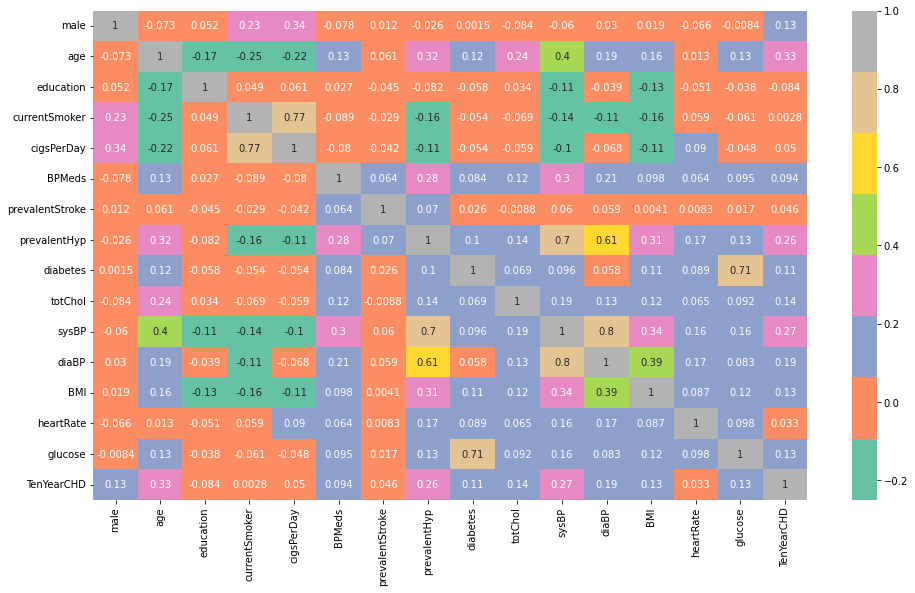

In [9]:
plt.figure(figsize=(16,9))
corr = data.corr()
sns.heatmap(corr, annot=True, cmap='Set2')
plt.show()


In [10]:
# training and normalization of data
X = data.iloc[:,:15]
Y = data.iloc[:,15:]

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.10, random_state=1)

In [11]:
Y

,TenYearCHD
3874,1
772,0
2088,1
462,0
770,0
...,...
3168,1
1045,1
702,0
594,0


In [12]:
test_accuracy = []
test_mse_value = []
train_accuracy = []
train_mse_value = []

for i in range(1,50):
  KNN= KNeighborsClassifier(n_neighbors=i)
  KNN.fit(X_train,Y_train)
  test_pred = KNN.predict(X_test)
  train_pred = KNN.predict(X_train)

  test_acc= round(accuracy_score(Y_test,test_pred), 5)*100 # Accuracy
  train_acc= round(accuracy_score(Y_train,train_pred), 5)*100 # Accuracy

  mse1 = round(mean_squared_error(Y_test,test_pred),3)
  mse2 = round(mean_squared_error(Y_train,train_pred),3)

  test_accuracy.append(test_acc)
  train_accuracy.append(train_acc)

  test_mse_value.append(mse1)
  train_mse_value.append(mse2)



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

In [13]:
print(train_accuracy)

[100.0, 78.947, 78.45100000000001, 72.78999999999999, 72.989, 69.414, 70.804, 69.414, 69.414, 67.428, 68.818, 67.726, 68.42099999999999, 66.435, 68.22200000000001, 66.733, 67.825, 66.634, 66.83200000000001, 65.74, 66.435, 65.839, 67.13, 65.641, 65.641, 65.34299999999999, 66.137, 65.938, 65.641, 65.045, 64.846, 65.44200000000001, 64.945, 65.839, 65.839, 66.137, 65.938, 65.641, 65.243, 65.839, 65.938, 65.243, 65.839, 65.144, 65.045, 64.846, 65.045, 65.144, 65.243]


In [14]:
print(test_accuracy)

[46.428999999999995, 49.107, 49.107, 53.571000000000005, 56.25, 51.786, 54.464, 50.893, 59.821000000000005, 55.357, 60.714, 58.036, 61.607, 61.607, 58.928999999999995, 61.607, 58.928999999999995, 56.25, 58.036, 55.357, 56.25, 54.464, 54.464, 55.357, 55.357, 53.571000000000005, 53.571000000000005, 54.464, 54.464, 54.464, 55.357, 50.893, 52.678999999999995, 50.893, 50.893, 50.893, 52.678999999999995, 54.464, 51.786, 51.786, 51.786, 52.678999999999995, 53.571000000000005, 54.464, 53.571000000000005, 53.571000000000005, 52.678999999999995, 51.786, 53.571000000000005]


In [15]:
print(test_mse_value)

[0.536, 0.509, 0.509, 0.464, 0.438, 0.482, 0.455, 0.491, 0.402, 0.446, 0.393, 0.42, 0.384, 0.384, 0.411, 0.384, 0.411, 0.438, 0.42, 0.446, 0.438, 0.455, 0.455, 0.446, 0.446, 0.464, 0.464, 0.455, 0.455, 0.455, 0.446, 0.491, 0.473, 0.491, 0.491, 0.491, 0.473, 0.455, 0.482, 0.482, 0.482, 0.473, 0.464, 0.455, 0.464, 0.464, 0.473, 0.482, 0.464]


In [16]:
print(train_mse_value)

[0.0, 0.211, 0.215, 0.272, 0.27, 0.306, 0.292, 0.306, 0.306, 0.326, 0.312, 0.323, 0.316, 0.336, 0.318, 0.333, 0.322, 0.334, 0.332, 0.343, 0.336, 0.342, 0.329, 0.344, 0.344, 0.347, 0.339, 0.341, 0.344, 0.35, 0.352, 0.346, 0.351, 0.342, 0.342, 0.339, 0.341, 0.344, 0.348, 0.342, 0.341, 0.348, 0.342, 0.349, 0.35, 0.352, 0.35, 0.349, 0.348]


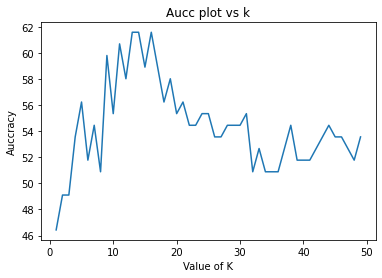

In [17]:
import matplotlib.pyplot as plt
x = [i for i in range(1,50)]
y = test_accuracy
plt.plot(x,y)
plt.title('Aucc plot vs k')
plt.xlabel('Value of K')
plt.ylabel('Auccracy')
plt.show()

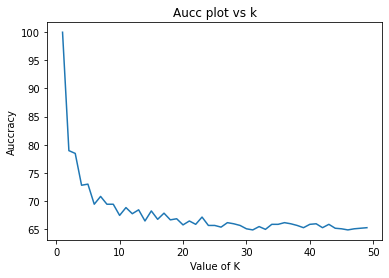

In [18]:
import matplotlib.pyplot as plt
x = [i for i in range(1,50)]
y = train_accuracy
plt.plot(x,y)
plt.title('Aucc plot vs k')
plt.xlabel('Value of K')
plt.ylabel('Auccracy')
plt.show()

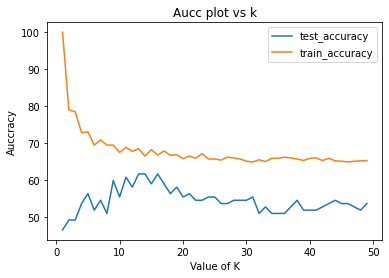

In [21]:
import matplotlib.pyplot as plt
x = [i for i in range(1,50)]
y = test_accuracy
y1 = train_accuracy
plt.plot(x,y, label = "test_accuracy")
plt.plot(x,y1, label = "train_accuracy")
plt.title('Aucc plot vs k')
plt.xlabel('Value of K')
plt.ylabel('Auccracy')
plt.legend()
plt.show()

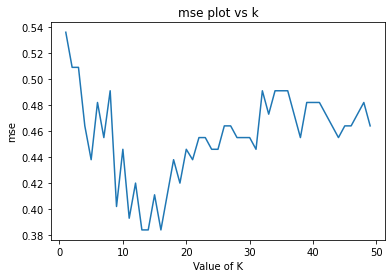

In [19]:
import matplotlib.pyplot as plt
x = [i for i in range(1,50)]
y1 = test_mse_value
plt.plot(x,y1)
plt.title('mse plot vs k')
plt.xlabel('Value of K')
plt.ylabel('mse')
plt.show()

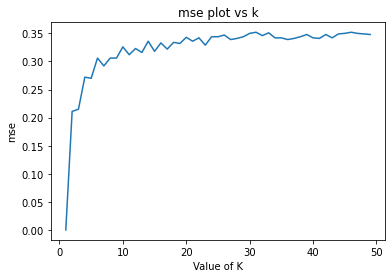

In [20]:
import matplotlib.pyplot as plt
x = [i for i in range(1,50)]
y1 = train_mse_value
plt.plot(x,y1)
plt.title('mse plot vs k')
plt.xlabel('Value of K')
plt.ylabel('mse')
plt.show()

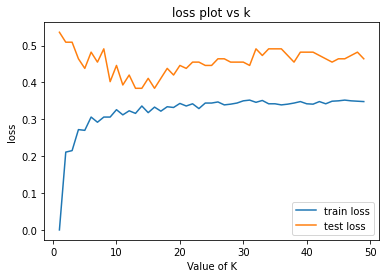

In [23]:
import matplotlib.pyplot as plt
x = [i for i in range(1,50)]
y = train_mse_value
y1 = test_mse_value
plt.plot(x,y,label = 'train loss')
plt.plot(x,y1,label = 'test loss')

plt.title('loss plot vs k')
plt.xlabel('Value of K')
plt.ylabel('loss')
plt.legend()
plt.show()

In [40]:
KNN = KNeighborsClassifier(n_neighbors=14)
KNN.fit(X_train,Y_train)
Y_pred= KNN.predict(X_test)

KNN_accuracy= round(accuracy_score(Y_test,Y_pred), 5)*100 # Accuracy
print(KNN_accuracy)

61.607


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


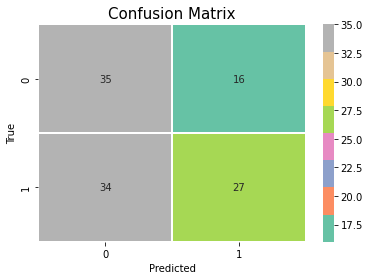

In [27]:
cm=confusion_matrix(Y_test,Y_pred)
class_label = [0, 1]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm,annot=True,cmap='Set2',linewidths=2,fmt='d')
plt.title("Confusion Matrix",fontsize=15)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [28]:
d = X_test.iloc[0:1]
d

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
2137,0,41,3.0,1,15.0,0.0,0,0,0,195.0,120.5,76.0,22.91,75.0,70.0


In [29]:
Y_score = KNN.predict(d)[0]
print(Y_score)

0


In [30]:
#SVM

In [31]:
from sklearn.svm import SVC
svc= SVC()
svc.fit(X_train,Y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [39]:
#test aucc
test_svc_accuracy= round(accuracy_score(Y_test,svc.predict(X_test)), 4)*100 # Accuracy
test_svc_accuracy

57.14

In [34]:
#Train aucc
train_svc_accuracy= round(accuracy_score(Y_train,svc.predict(X_train)), 4)*100 # Accuracy
train_svc_accuracy

66.83

In [ ]:
# Logistic

In [35]:
from sklearn.linear_model import LogisticRegression
log_regression = LogisticRegression()
log_regression.fit(X_train,Y_train)
Y_pred = log_regression.predict(X_test)
lg_accuracy= round(accuracy_score(Y_test,Y_pred), 4)*100 # Accuracy
lg_accuracy

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


58.93000000000001